# General info on the fullCyc dataset (as it pertains to SIPSim validation)

* Simulating 12C gradients
* Determining if simulated taxon abundance distributions resemble the true distributions
* Simulation parameters to infer from dataset:
  * Infer total richness of bulk soil community 
    * richness of starting community
  * Infer abundance distribution of bulk soil community
    * NO: distribution fit
    * INSTEAD: using relative abundances of bulk soil community
  * Get distribution of total OTU abundances per fraction
    * Number of sequences per sample

# User variables

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
workDir = '/home/nick/notebook/SIPSim/dev/fullCyc/'
physeqDir = '/home/nick/notebook/SIPSim/dev/fullCyc_trim/'

physeqBulkCore = 'bulk-core_trm'
physeqSIP = 'SIP-core_unk_trm'

In [286]:
ampFragFile = '/home/nick/notebook/SIPSim/dev/bac_genome1147/validation/ampFrags_kde.pkl'

# Init

In [174]:
import os

In [3]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
library(phyloseq)
library(fitdistrplus)
library(sads)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Need help? Try the ggplot2 mailing list:
http://groups.google.com/group/ggplot2.

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: 

In [4]:
%%R
dir.create(workDir, showWarnings=FALSE)

# Loading phyloseq list datasets

In [5]:
%%R
# bulk core samples
F = file.path(physeqDir, physeqBulkCore)
physeq.bulk = readRDS(F)
#physeq.bulk.m = physeq.bulk %>% sample_data
physeq.bulk %>% names

[1] "12C-Con.D3.R3_bulk"  "12C-Con.D6.R2_bulk"  "12C-Con.D30.R1_bulk"
[4] "12C-Con.D1.R2_bulk"  "12C-Con.D48.R3_bulk" "12C-Con.D14.R1_bulk"


In [6]:
%%R
# SIP core samples
F = file.path(physeqDir, physeqSIP)
physeq.SIP = readRDS(F)
#physeq.SIP.m = physeq.SIP %>% sample_data
physeq.SIP %>% names

[1] "12C-Con.D3.R3_bulk"  "12C-Con.D6.R2_bulk"  "12C-Con.D30.R1_bulk"
[4] "12C-Con.D1.R2_bulk"  "12C-Con.D48.R3_bulk" "12C-Con.D14.R1_bulk"


#  Infer abundance distribution of each bulk soil community

* distribution fit

In [29]:
%%R

physeq2otu.long = function(physeq){
    df.OTU = physeq %>%
        transform_sample_counts(function(x) x/sum(x)) %>%
        otu_table %>%
        as.matrix %>% 
        as.data.frame 

    df.OTU$OTU = rownames(df.OTU)
    df.OTU = df.OTU %>% 
        gather('sample', 'abundance', 1:(ncol(df.OTU)-1))
    return(df.OTU)
}

df.OTU.l = lapply(physeq.bulk, physeq2otu.long)                                
df.OTU.l %>% names
                                
#df.OTU = do.call(rbind, lapply(physeq.bulk, physeq2otu.long))
#df.OTU$Day = gsub('.+\\.D([0-9]+)\\.R.+', '\\1', df.OTU$sample) 
#df.OTU %>% head(n=3)

[1] "12C-Con.D3.R3_bulk"  "12C-Con.D6.R2_bulk"  "12C-Con.D30.R1_bulk"
[4] "12C-Con.D1.R2_bulk"  "12C-Con.D48.R3_bulk" "12C-Con.D14.R1_bulk"


$`12C-Con.D3.R3_bulk`
summary statistics
------
min:  9.923588e-05   max:  0.09685422 
median:  0.0002977077 
mean:  0.000907441 
estimated sd:  0.004143241 
estimated skewness:  16.62939 
estimated kurtosis:  334.6113 

$`12C-Con.D6.R2_bulk`
summary statistics
------
min:  0.0001907851   max:  0.07431079 
median:  0.0003815702 
mean:  0.000907441 
estimated sd:  0.003159572 
estimated skewness:  15.7123 
estimated kurtosis:  317.8194 

$`12C-Con.D30.R1_bulk`
summary statistics
------
min:  0.000147167   max:  0.03443709 
median:  0.0004415011 
mean:  0.000907441 
estimated sd:  0.001786584 
estimated skewness:  9.911855 
estimated kurtosis:  146.0765 

$`12C-Con.D1.R2_bulk`
summary statistics
------
min:  0.0001331026   max:  0.06382271 
median:  0.0003327566 
mean:  0.000907441 
estimated sd:  0.003638309 
estimated skewness:  12.9856 
estimated kurtosis:  197.8508 

$`12C-Con.D48.R3_bulk`
summary statistics
------
min:  0.0002283974   max:  0.03410735 
median:  0.0004567948 
mean:  

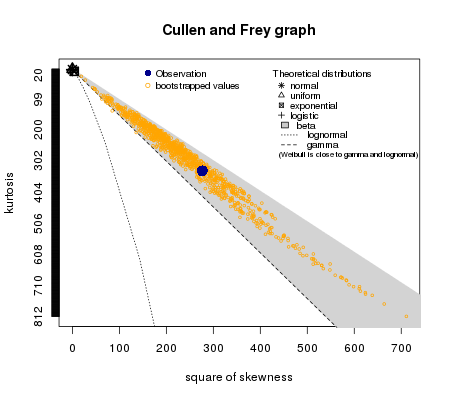

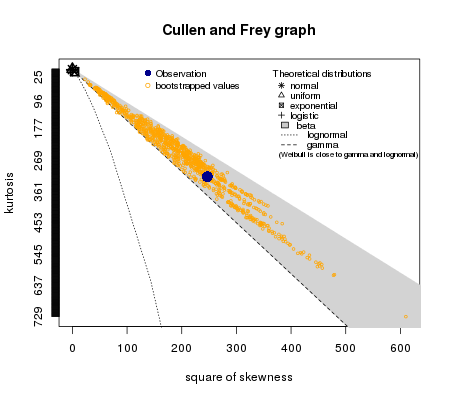

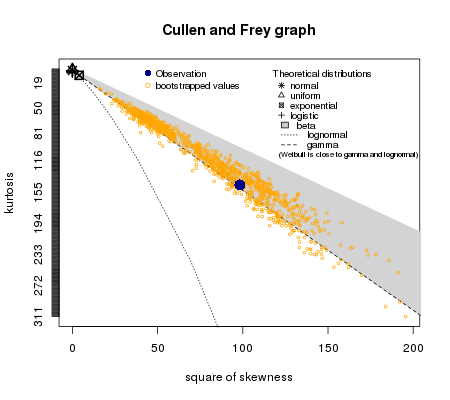

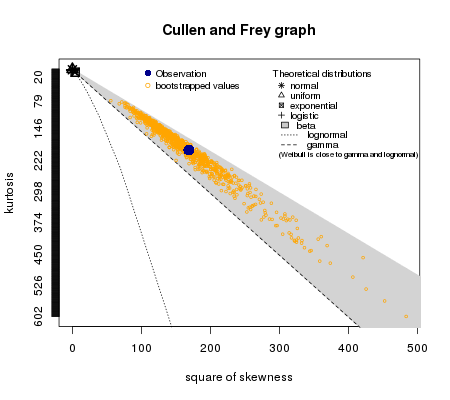

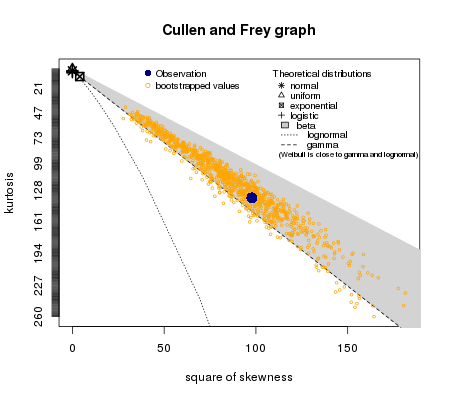

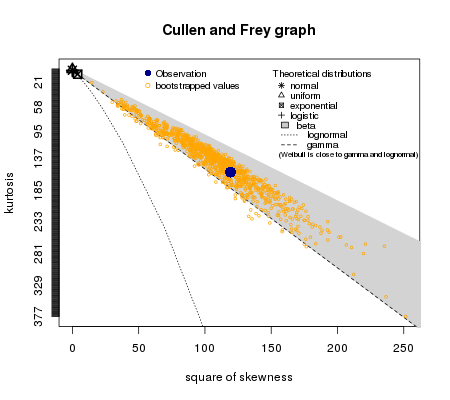

In [31]:
%%R -w 450 -h 400

lapply(df.OTU.l, function(x) descdist(x$abundance, boot=1000))

Goodness-of-fit statistics
                             exponential  lognormal      gamma       beta
Kolmogorov-Smirnov statistic   0.3253659  0.1584394  0.2459352  0.2465466
Cramer-von Mises statistic    36.2500825  6.0882212 22.1176264 22.3710024
Anderson-Darling statistic           Inf 33.9839705        Inf        Inf

Goodness-of-fit criteria
                               exponential lognormal     gamma     beta
Aikake's Information Criterion   -13232.76 -14306.01 -13366.44 -13352.9
Bayesian Information Criterion   -13227.76 -14296.00 -13356.43 -13342.9
Goodness-of-fit statistics
                             exponential  lognormal     gamma       beta
Kolmogorov-Smirnov statistic   0.2617918  0.1774821  0.232915  0.2334714
Cramer-von Mises statistic    25.0569153  7.6992102 20.533419 20.6905360
Anderson-Darling statistic           Inf 47.3460141       Inf        Inf

Goodness-of-fit criteria
                               exponential lognormal     gamma      beta
Aikake's Informat

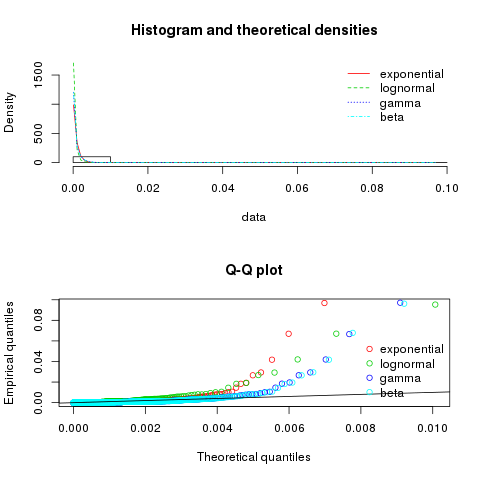

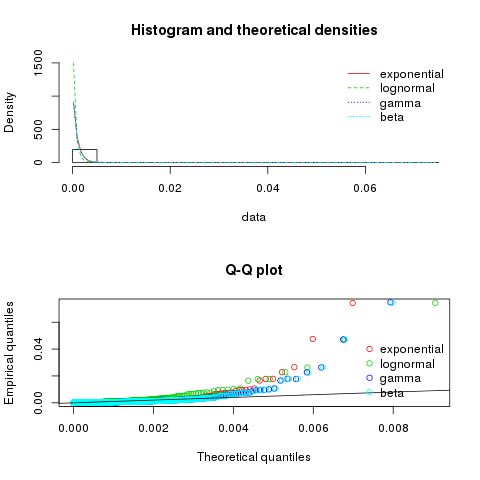

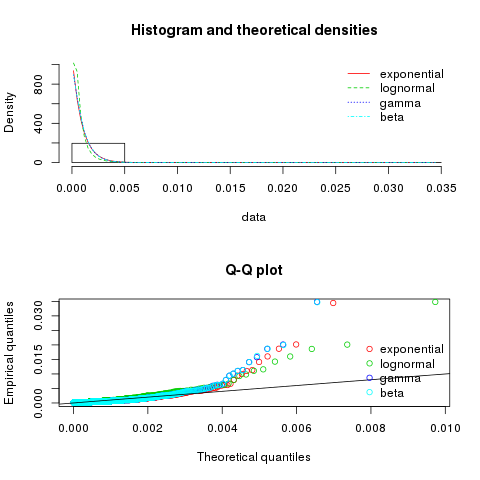

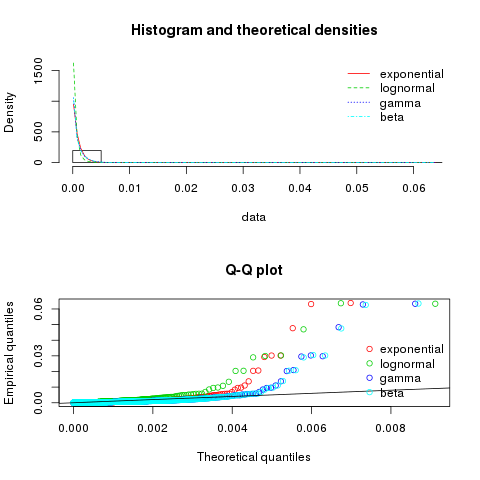

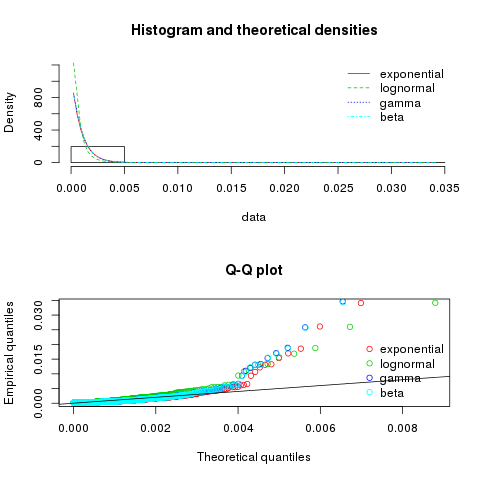

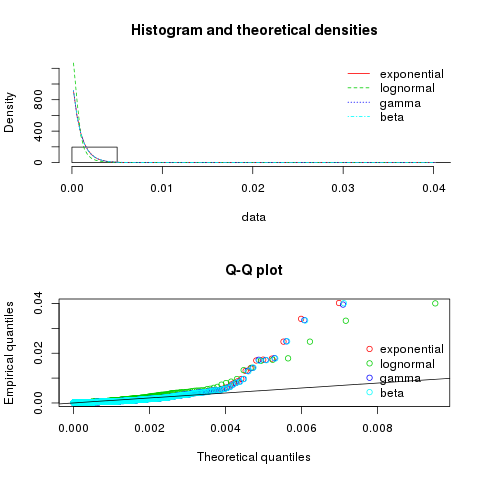

In [48]:
%%R
fitdists = function(x){
    fit.l = list()
    #fit.l[['norm']] = fitdist(x$abundance, 'norm')
    fit.l[['exp']] = fitdist(x$abundance, 'exp')
    fit.l[['logn']] = fitdist(x$abundance, 'lnorm')
    fit.l[['gamma']] = fitdist(x$abundance, 'gamma')
    fit.l[['beta']] = fitdist(x$abundance, 'beta')
    
    # plotting
    plot.legend = c('exponential', 'lognormal', 'gamma', 'beta')
    par(mfrow = c(2,1))
    denscomp(fit.l, legendtext=plot.legend)
    qqcomp(fit.l, legendtext=plot.legend)
    
    # fit summary
    gofstat(fit.l, fitnames=plot.legend) %>% print
    
    return(fit.l)
}

fits.l = lapply(df.OTU.l, fitdists)
fits.l %>% names

In [50]:
%%R
# getting summaries for lognormal fits
get.summary = function(x, id='logn'){
    summary(x[[id]])
}

fits.s = lapply(fits.l, get.summary)
fits.s %>% names

[1] "12C-Con.D3.R3_bulk"  "12C-Con.D6.R2_bulk"  "12C-Con.D30.R1_bulk"
[4] "12C-Con.D1.R2_bulk"  "12C-Con.D48.R3_bulk" "12C-Con.D14.R1_bulk"


In [74]:
%%R
# listing estimates for fits
df.fits = do.call(rbind, lapply(fits.s, function(x) x$estimate)) %>% as.data.frame
df.fits$Sample = rownames(df.fits)
df.fits$Day = gsub('.+D([0-9]+)\\.R.+', '\\1', df.fits$Sample) %>% as.numeric
df.fits

                      meanlog     sdlog              Sample Day
12C-Con.D3.R3_bulk  -7.909888 0.9982086  12C-Con.D3.R3_bulk   3
12C-Con.D6.R2_bulk  -7.722864 0.9097258  12C-Con.D6.R2_bulk   6
12C-Con.D30.R1_bulk -7.520797 0.8705681 12C-Con.D30.R1_bulk  30
12C-Con.D1.R2_bulk  -7.830521 0.9443204  12C-Con.D1.R2_bulk   1
12C-Con.D48.R3_bulk -7.519738 0.8397330 12C-Con.D48.R3_bulk  48
12C-Con.D14.R1_bulk -7.597843 0.8871500 12C-Con.D14.R1_bulk  14


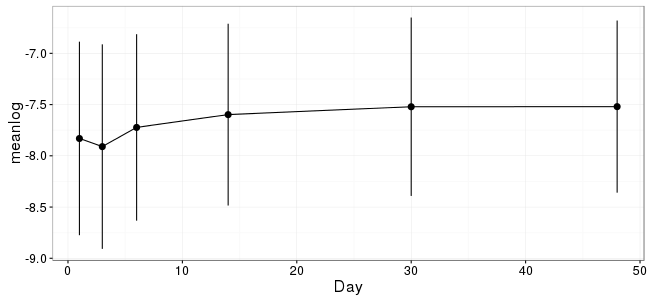

In [78]:
%%R -w 650 -h 300
ggplot(df.fits, aes(Day, meanlog,
                    ymin=meanlog-sdlog,
                    ymax=meanlog+sdlog)) +
    geom_pointrange() +
    geom_line() +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )

In [60]:
%%R
# mean of estimaates
apply(df.fits, 2, mean)

   meanlog      sdlog 
-7.6836085  0.9082843 


# Relative abundance of most abundant taxa

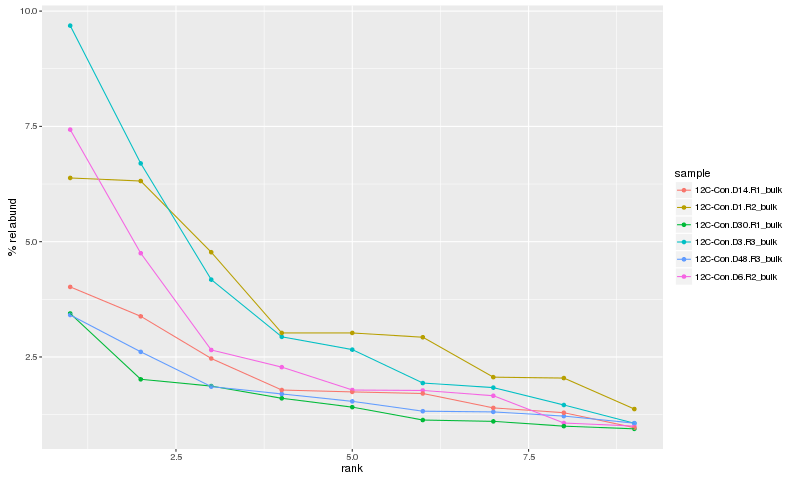

In [102]:
%%R -w 800
df.OTU = do.call(rbind, df.OTU.l) %>%
    mutate(abundance = abundance * 100) %>%
    group_by(sample) %>%
    mutate(rank = row_number(desc(abundance))) %>%
    ungroup() %>%
    filter(rank < 10)

ggplot(df.OTU, aes(rank, abundance, color=sample, group=sample)) +
    geom_point() +
    geom_line() +
    labs(y = '% rel abund')

# Making a community file for the simulations

[1] 1102


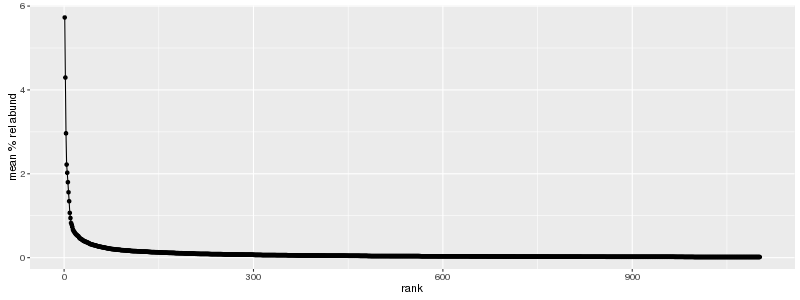

In [272]:
%%R -w 800 -h 300
df.OTU = do.call(rbind, df.OTU.l) %>%
    mutate(abundance = abundance * 100) %>%
    group_by(sample) %>%
    mutate(rank = row_number(desc(abundance))) %>%
    group_by(rank) %>%
    summarize(mean_abundance = mean(abundance)) %>%
    ungroup() %>%
    mutate(library = 1,
           mean_abundance = mean_abundance / sum(mean_abundance) * 100) %>%
    rename('rel_abund_perc' = mean_abundance) %>%
    dplyr::select(library, rel_abund_perc, rank) %>%
    as.data.frame

df.OTU %>% nrow %>% print

ggplot(df.OTU, aes(rank, rel_abund_perc)) +
    geom_point() +
    geom_line() +
    labs(y = 'mean % rel abund')

### Adding reference genome taxon names

In [273]:
ret = !SIPSim KDE_info -t /home/nick/notebook/SIPSim/dev/bac_genome1147/validation/ampFrags_kde.pkl
ret = ret[1:]
ret[:5]

['Tropheryma_whipplei_str_Twist',
 'Caldisericum_exile_AZM16c01',
 'Sorangium_cellulosum_So0157-2',
 'Bacillus_subtilis_QB928',
 'Anabaena_cylindrica_PCC_7122']

In [274]:
%%R

F = '/home/nick/notebook/SIPSim/dev/fullCyc_trim//ampFrags_kde_amplified.txt'
ret = read.delim(F, sep='\t')
ret = ret$genomeID
ret %>% length %>% print
ret %>% head

[1] 1102
[1] Tropheryma_whipplei_str_Twist   Sorangium_cellulosum_So0157-2  
[3] Bacillus_subtilis_QB928         Anabaena_cylindrica_PCC_7122   
[5] Haemophilus_parainfluenzae_T3T1 Delftia_acidovorans_SPH-1      
6 Levels: Anabaena_cylindrica_PCC_7122 ... Tropheryma_whipplei_str_Twist


In [275]:
%%R
ret %>% length %>% print
df.OTU %>% nrow

[1] 1102
[1] 1102


In [276]:
%%R -i ret

# randomize
ret = ret %>% sample %>% sample %>% sample

# adding to table
df.OTU$taxon_name = ret[1:nrow(df.OTU)]
df.OTU = df.OTU %>% 
    dplyr::select(library, taxon_name, rel_abund_perc, rank)
df.OTU %>% head

  library                                      taxon_name rel_abund_perc rank
1       1                     Lactobacillus_reuteri_I5007       5.728702    1
2       1                 Thermoanaerobacter_italicus_Ab9       4.295700    2
3       1                Intrasporangium_calvum_DSM_43043       2.965853    3
4       1                       Nitrosomonas_eutropha_C91       2.220702    4
5       1           Arthrobacter_phenanthrenivorans_Sphe3       2.026430    5
6       1 Bifidobacterium_animalis_subsp_lactis_DSM_10140       1.800652    6


In [245]:
%%R
#-- debug -- #
df.gc = read.delim('~/notebook/SIPSim/dev/bac_genome1147/validation/ampFrags_parsed_kde_info.txt', 
                   sep='\t', row.names=)
top.taxa = df.gc %>% 
    filter(KDE_ID == 1, median > 1.709, median < 1.711) %>% 
    dplyr::select(taxon_ID) %>% 
    mutate(taxon_ID = taxon_ID %>% sample) %>%
    head

top.taxa = top.taxa$taxon_ID %>% as.vector
top.taxa

[1] "Bacteroides_salanitronis_DSM_18170"               
[2] "Geobacter_uraniireducens_Rf4"                     
[3] "Shewanella_amazonensis_SB2B"                      
[4] "Mesotoga_prima_MesG1_Ag_4_2"                      
[5] "Selenomonas_ruminantium_subsp_lactilytica_TAM6421"
[6] "Escherichia_fergusonii_ATCC_35469"                


In [246]:
%%R
#-- debug -- #
p1 = df.OTU %>%
    filter(taxon_name %in% top.taxa)
p2 = df.OTU %>%
    head(n=length(top.taxa))
p3 = anti_join(df.OTU, rbind(p1, p2), c('taxon_name' = 'taxon_name'))

df.OTU %>% nrow %>% print
p1 %>% nrow %>% print
p2 %>% nrow %>% print
p3 %>% nrow %>% print

p1 = p2$taxon_name
p2$taxon_name = top.taxa

df.OTU = rbind(p2, p1, p3)
df.OTU %>% nrow %>% print
df.OTU %>% head

[1] 1097
[1] 6
[1] 6
[1] 1086
[1] 1093
  library                                        taxon_name   rel_abund_perc
1       1                Bacteroides_salanitronis_DSM_18170 5.72870163814788
2       1                      Geobacter_uraniireducens_Rf4 4.29570006895946
3       1                       Shewanella_amazonensis_SB2B 2.96585281873549
4       1                       Mesotoga_prima_MesG1_Ag_4_2 2.22070236873107
5       1 Selenomonas_ruminantium_subsp_lactilytica_TAM6421 2.02642996420269
6       1                 Escherichia_fergusonii_ATCC_35469 1.80065201833062
  rank
1    1
2    2
3    3
4    4
5    5
6    6


### Writing file

In [278]:
%%R 

F = file.path(workDir, 'fullCyc_12C-Con_trm_comm.txt')
write.table(df.OTU, F, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', F, '\n')

File written: /home/nick/notebook/SIPSim/dev/fullCyc//fullCyc_12C-Con_trm_comm.txt 


### parsing amp-Frag file to match comm file

In [285]:
!tail -n +2 /home/nick/notebook/SIPSim/dev/fullCyc/fullCyc_12C-Con_trm_comm.txt | \
    cut -f 2 > /home/nick/notebook/SIPSim/dev/fullCyc/fullCyc_12C-Con_trm_comm_taxa.txt

In [289]:
outFile = os.path.splitext(ampFragFile)[0] + '_parsed.pkl'
!SIPSim KDE_parse \
    $ampFragFile \
    /home/nick/notebook/SIPSim/dev/fullCyc/fullCyc_12C-Con_trm_comm_taxa.txt \
    > $outFile
    
print 'File written {}'.format(outFile)
!SIPSim KDE_info -n $outFile

File written /home/nick/notebook/SIPSim/dev/bac_genome1147/validation/ampFrags_kde_parsed.pkl
Loading KDEs...
1102
